<h1><center>Gender Recognition by Voice</center></h1>

![title](ImagesNotebook/imageintro.png)

##### By Garance Roux / Marion Pobelle / Amadou Sangare / Léo Ressayre

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [5]:
filepath = './archive/voice.csv'
voice_data = pd.read_csv(filepath)
voice_data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [6]:
# On affiche quelques informations sur les données
voice_data.describe()

meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042560     1.649569     5.669547     0.861811     0.258041   
50%       0.094280     2.197101     8.318463     0.901767     0.396335   
75%       0.114175     2.931694    13.648905     0.928713     0.533676   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.165282     0.180907     0.142807     0.036802     0.258842   
std       0.077203     0.029918     0.032304     0.019220     0.030077   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118016     0.163662     0.116998     0.018223     0.253968   
50%       0.186599     0.184838     0.140519     0.046110     0.271186   
75%       0.221104     0.199146     0.169581     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.829211     0.052647     5.047277     4.994630     0.173752  
std       0.525205     0.063299     3.521157     3.520039     0.119454  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.419828     0.007812     2.070312     2.044922     0.099766  
50%       0.765795     0.023438     4.992188     4.945312     0.139357  
75%       1.177166     0.070312     7.007812     6.992188     0.209183  
max       2.957682     0.458984    21.867188    21.843750     0.932374

In [8]:
# Taille du tableau de données
voice_data.shape

(3168, 21)

In [5]:
# Recherche des valeurs manquantes
missing_values_count = voice_data.isnull().sum()
missing_values_count

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

## Visualisation

/home/amadou/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


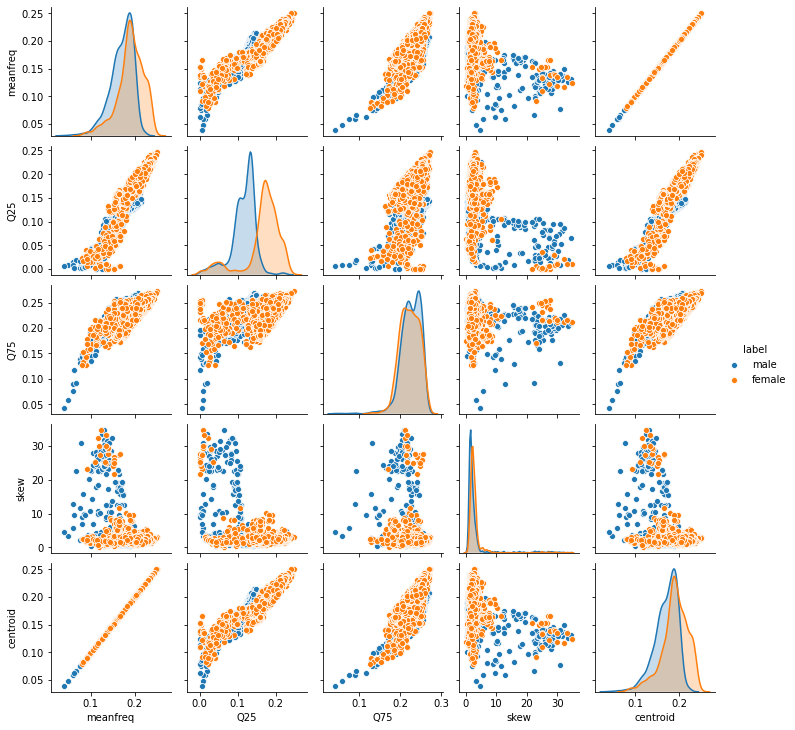

In [6]:
# Affichage des graphes des features les unes par rapport aux autres
sns.pairplot(voice_data[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], 
                 hue='label', size=2)

**Commentaire :** <br/>
    On remarque que la plupart des features font se confondre les valeurs attribuées aux voix de femmes et d'hommes.
    En revanche, la features Q25, elle, donne l'impression de mieux départager les deux types de voix.
    Nous nous servirons de cette features pour tenter d'améliorer notre score.

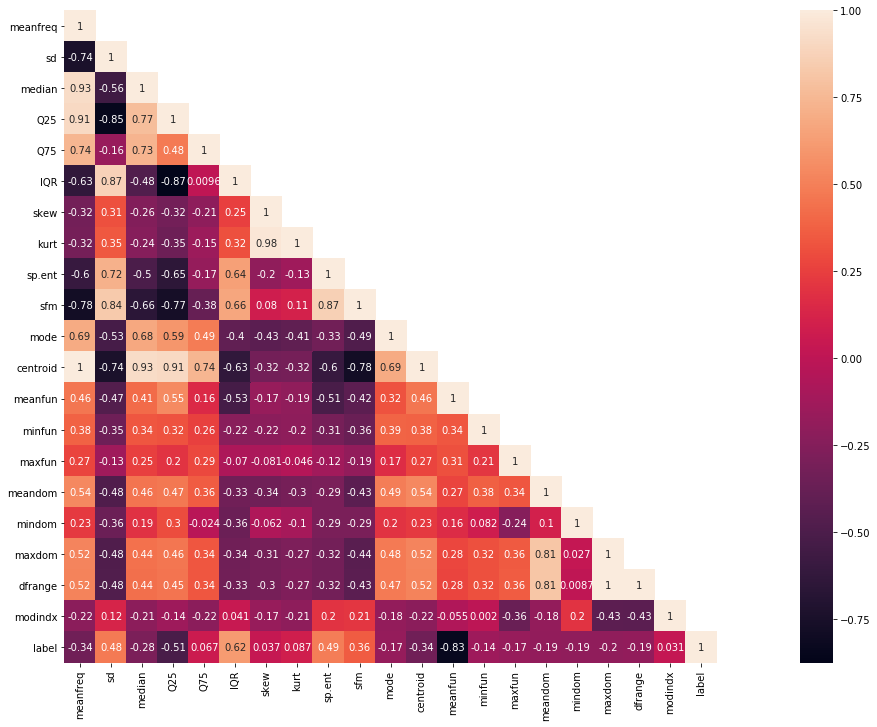

In [9]:
# Affichage de la matrice de corélation
voice_data_ = voice_data.copy()
voice_data_['label']=voice_data_['label'].replace({'male':1,'female':0})

cor_mat= voice_data_[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig= plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

**Commentaire :**<br/>
    * Nous observons que certaines features, notamment la 'IQR', sont très corrélées au label
    * A l'inverse, certaines features ne sont pas du tout corrélées ('skew', 'kurt', 'modindx')
    * Enfin, nous voyons que certaines features sont très corrélées entre elles, comme les couples 'centroid':'meanfreq' et 'centroid':'median'
    
Ces observations nous permettront de tenter d'améliorer nos scores en modifint à la main les données

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Preprocessing


### Transformation des male et female en valeur numérique

In [11]:
label_encoder = LabelEncoder()
X = voice_data[voice_data.columns[:-1]]
y = pd.Series(label_encoder.fit_transform(voice_data['label']))


### Création de quelques datasets

In [12]:
# On double 'Q25'
X_prime = X.copy()
X_prime['Q25.2'] = X['Q25'].copy()

# On double 'IQR'
X_2 = X.copy()
X_2['IQR.2'] = X['IQR'].copy()

# On supprime les features non correlées au label
X_3 = X.copy()
X_3 = X_3.drop(['skew', 'kurt', 'modindx'], axis=1)

# On double 'IQR', on supprime les features non correlées au label, ainsi que la feature centroid 
# qui est trop correlée à d'autres features
X_2_3 = X_2.drop(['skew', 'kurt', 'modindx', 'centroid'], axis=1)


### Standardisation du dataset

In [14]:
standard_scaler = StandardScaler()
features = X.columns.copy()
X_scaled = pd.DataFrame(standard_scaler.fit_transform(X))
X_scaled.columns = X.columns

In [15]:
X_scaled

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0    -4.049248  0.427355 -4.224901 -2.576102 -5.693607 -0.214778  2.293306   
1    -3.841053  0.611669 -3.999293 -2.486885 -5.588987 -0.258485  4.548056   
2    -3.463066  1.603848 -4.095851 -2.706986 -3.928699  0.909326  6.513656   
3    -0.992157  0.899998 -0.759454 -0.901418 -0.711205  0.632690 -0.449858   
4    -1.530640  1.322561 -1.676948 -1.268395 -0.792029  1.005588 -0.480911   
...        ...       ...       ...       ...       ...       ...       ...   
3163 -1.638842  1.658182 -0.877839 -1.873163 -0.999378  1.579141 -0.325020   
3164 -2.162452  1.927682 -2.994482 -2.008095 -0.840021  1.820721 -0.577009   
3165 -1.298773  2.322724 -0.051973 -2.199039 -0.017123  2.492666 -0.298044   
3166 -1.245202  2.012196 -0.017728 -1.991852 -0.204021  2.153653 -0.365367   
3167 -0.514746  2.147651 -0.070879 -1.446089  1.102679  2.254671 -0.338487   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0     1.762946 -0.039083  0.471575 -2.141210 -4.049248 -1.812038 -1.097998   
1     4.433008 -0.065236  0.594431 -2.141210 -3.841053 -1.079594 -1.091533   
2     7.326207 -1.083730  0.398261 -2.141210 -3.463066 -1.365368 -1.100397   
3    -0.240099  1.516383  1.797340 -1.054576 -0.992157 -1.666966 -0.988934   
4    -0.238940  1.708336  2.114740 -0.790514 -1.530640 -1.127233 -1.034015   
...        ...       ...       ...       ...       ...       ...       ...   
3163 -0.221916  1.507749  1.999883  0.460602 -1.638842  1.237885  2.444087   
3164 -0.252503  1.458418  1.697831 -1.963949 -2.162452  1.429532 -0.124536   
3165 -0.222108  1.150198  1.385857 -2.037497 -1.298773  2.077781  0.140728   
3166 -0.231123  1.229850  1.505711  0.607848 -1.245202  0.915445 -0.120678   
3167 -0.228300  0.971759  1.089126  1.326841 -0.514746  1.325111  1.324614   

        maxfun   meandom    mindom    maxdom   dfrange   modindx  
0     0.565959 -1.564205 -0.708404 -1.431422 -1.419137 -1.454772  
1    -0.294030 -1.561916 -0.708404 -1.418107 -1.405818 -1.014103  
2     0.410480 -1.563866 -0.708404 -1.429203 -1.416917 -1.065344  
3    -0.294030 -1.195367 -0.708404 -1.273867 -1.261532  0.614286  
4     0.260185 -0.221660 -0.708404  0.124154  0.136933  0.289046  
...        ...       ...       ...       ...       ...       ...  
3163  0.114817  0.007024 -0.708404 -0.237556 -0.224892 -0.098989  
3164  0.565959  0.153573 -0.214641 -0.388453 -0.384717  0.871981  
3165  0.565959 -0.637833 -0.708404 -0.599266 -0.586717  0.175887  
3166 -0.294030 -0.072080 -0.708404 -0.412863 -0.400255  1.149161  
3167  0.410480 -1.146760 -0.708404 -1.276086 -1.263752  1.475679  

[3168 rows x 20 columns]

In [16]:
y.tail()

3163    0
3164    0
3165    0
3166    0
3167    0
dtype: int32

### Séparation des datasets en 'train set', 'validation set' et 'test set'

In [17]:
train_size = 0.6
validation_size = 0.2
test_size = 0.2

# X normale
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=test_size+validation_size, random_state=1)
X_validation, X_test, y_validation, y_test = train_test_split(X_, y_, test_size=test_size, random_state=1)

# X_scaled
X_scaled_train, X_, _, _ = train_test_split(X_scaled, y, test_size=test_size+validation_size, random_state=1)
X_scaled_validation, X_scaled_test, _ , _ = train_test_split(X_, y_, test_size=test_size, random_state=1)

# X_prime
X_prime_train, X_, _, _ = train_test_split(X_prime, y, test_size=test_size+validation_size, random_state=1)
X_prime_validation, X_prime_test, _ , _ = train_test_split(X_, y_, test_size=test_size, random_state=1)

# X_2
X_2_train, X_, _, _ = train_test_split(X_2, y, test_size=test_size+validation_size, random_state=1)
X_2_validation, X_2_test, _ , _ = train_test_split(X_, y_, test_size=test_size, random_state=1)

In [14]:
X_train

meanfreq        sd    median       Q25       Q75       IQR      skew  \
2998  0.166422  0.052698  0.166966  0.153113  0.194301  0.041187  3.271182   
2132  0.191832  0.042054  0.194731  0.184405  0.208894  0.024489  3.182206   
2105  0.186661  0.028007  0.183060  0.176136  0.196909  0.020773  4.394837   
1685  0.166236  0.073348  0.188343  0.112615  0.221038  0.108423  6.478942   
2456  0.205307  0.039341  0.204499  0.192851  0.223914  0.031063  2.804990   
...        ...       ...       ...       ...       ...       ...       ...   
2763  0.193508  0.033231  0.195871  0.169985  0.206656  0.036672  2.838682   
905   0.182869  0.072266  0.196690  0.125704  0.246972  0.121268  1.944517   
1096  0.193626  0.058645  0.213084  0.131215  0.245234  0.114019  1.320157   
235   0.141769  0.076514  0.119600  0.101415  0.220316  0.118901  3.380194   
1061  0.194565  0.057716  0.217628  0.137756  0.240513  0.102756  2.033257   

           kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
2998  16.140761  0.907315  0.493212  0.158654  0.166422  0.153660  0.069930   
2132  14.476120  0.853694  0.324583  0.186470  0.191832  0.179635  0.065574   
2105  28.271674  0.786935  0.175778  0.180464  0.186661  0.177578  0.033755   
1685  82.809531  0.925455  0.604048  0.050020  0.166236  0.149100  0.016667   
2456  11.831436  0.838101  0.231699  0.198891  0.205307  0.162557  0.049332   
...         ...       ...       ...       ...       ...       ...       ...   
2763  12.826058  0.839934  0.185345  0.202342  0.193508  0.158759  0.047059   
905    7.555957  0.925274  0.537491  0.245000  0.182869  0.134021  0.047384   
1096   4.261363  0.911859  0.344199  0.246729  0.193626  0.124478  0.047904   
235   19.683095  0.926782  0.588819  0.000000  0.141769  0.116390  0.017486   
1061   7.846657  0.907278  0.369606  0.237821  0.194565  0.124894  0.048290   

        maxfun   meandom    mindom     maxdom    dfrange   modindx  
2998  0.238095  1.001465  0.156250   3.994141   3.837891  0.360932  
2132  0.253968  1.150065  0.101562   6.859375   6.757812  0.295049  
2105  0.266667  1.214844  0.171875   6.421875   6.250000  0.221417  
1685  0.250000  0.244792  0.054688   0.773438   0.718750  0.379599  
2456  0.262295  1.742852  0.210938  12.023438  11.812500  0.114815  
...        ...       ...       ...        ...        ...       ...  
2763  0.279070  1.026367  0.023438  10.664062  10.640625  0.067009  
905   0.279070  0.752344  0.023438   8.320312   8.296875  0.092722  
1096  0.275862  1.190199  0.023438   5.882812   5.859375  0.149887  
235   0.258065  0.081308  0.007812   0.156250   0.148438  0.412281  
1061  0.279070  1.907292  0.023438   8.484375   8.460938  0.128702  

[1900 rows x 20 columns]

In [15]:
y_validation

218     1
1965    0
2015    0
774     1
2356    0
       ..
1210    1
1864    0
1135    1
12      1
3008    0
Length: 1014, dtype: int64

In [16]:
X_test

meanfreq        sd    median       Q25       Q75       IQR       skew  \
1100  0.198308  0.060483  0.220634  0.137429  0.253823  0.116394   1.438620   
1452  0.177029  0.059681  0.182264  0.138415  0.219774  0.081358   1.363649   
2581  0.233376  0.029077  0.232098  0.225255  0.248635  0.023381   3.064446   
119   0.107130  0.084279  0.095355  0.028873  0.172513  0.143640  23.987839   
2297  0.199537  0.061506  0.220235  0.184000  0.236235  0.052235   2.597053   
...        ...       ...       ...       ...       ...       ...        ...   
642   0.092579  0.080289  0.066576  0.016433  0.166652  0.150218   3.570619   
123   0.162515  0.076269  0.172965  0.089418  0.239428  0.150010  17.750146   
2527  0.210410  0.031812  0.208315  0.193917  0.227002  0.033085   2.677560   
1926  0.153289  0.109044  0.209823  0.000235  0.240908  0.240673  26.756185   
630   0.141419  0.073749  0.140326  0.083413  0.208099  0.124686   1.500373   

            kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
1100    5.002659  0.903695  0.321622  0.255225  0.198308  0.135740  0.050420   
1452    4.965680  0.928719  0.491603  0.173811  0.177029  0.124015  0.048144   
2581   13.347782  0.787623  0.125335  0.226965  0.233376  0.186178  0.050104   
119   658.305024  0.939773  0.716470  0.000000  0.107130  0.107765  0.017957   
2297   11.836669  0.907332  0.497158  0.225412  0.199537  0.183936  0.049844   
...          ...       ...       ...       ...       ...       ...       ...   
642    19.677106  0.931496  0.617675  0.010956  0.092579  0.160002  0.021080   
123   392.954344  0.904218  0.519067  0.060057  0.162515  0.057045  0.018454   
2527   10.777865  0.848660  0.180822  0.207702  0.210410  0.169831  0.049587   
1926  770.501237  0.750023  0.214378  0.000000  0.153289  0.188858  0.016048   
630     5.685817  0.967774  0.748328  0.104050  0.141419  0.107725  0.020806   

        maxfun   meandom    mindom     maxdom    dfrange   modindx  
1100  0.275862  1.005632  0.023438   4.218750   4.195312  0.190660  
1452  0.279070  1.202474  0.023438   5.882812   5.859375  0.087000  
2581  0.275862  1.746094  0.023438   9.257812   9.234375  0.121827  
119   0.253968  0.007812  0.007812   0.007812   0.000000  0.000000  
2297  0.279070  2.126524  0.023438  10.429688  10.406250  0.142342  
...        ...       ...       ...        ...        ...       ...  
642   0.246154  0.698017  0.007812   5.703125   5.695312  0.139808  
123   0.225352  0.070312  0.070312   0.070312   0.000000  0.000000  
2527  0.268156  1.501399  0.023438   9.750000   9.726562  0.126934  
1926  0.275862  0.007812  0.007812   0.007812   0.000000  0.000000  
630   0.213333  0.412861  0.007812   2.992188   2.984375  0.140524  

[254 rows x 20 columns]

In [17]:
print(X_train.shape, X_validation.shape, X_test.shape)

(1900, 20) (1014, 20) (254, 20)


In [18]:
print(f'X_shape = ({X_train.shape[0] + X_validation.shape[0] + X_test.shape[0]}, {X_train.shape[1]})')

X_shape = (3168, 20)


In [19]:
print(f'X_shape = {X.shape}')

X_shape = (3168, 20)


## RandomForestClassifier
### Optimisation des hyper-paramètres

In [20]:
from sklearn.model_selection import GridSearchCV

In [19]:
# Optimisation à la main des paramètres
# n_estimator
def n_estimator_optimization(values, X_train, X_validation):
    for n in values:
        rf_model = RandomForestClassifier(n_estimators=n, random_state=1)
        rf_model.fit(X_train, y_train)
        y_pred =rf_model.predict(X_validation)
        print(f'For n_estimators={n}, error = {mean_absolute_error(y_true=y_validation, y_pred=y_pred)}')

# max_depth
def max_depth_optimization(values, X_train, X_validation):
    for depth in values:
        rf_model = RandomForestClassifier(max_depth=depth, random_state=1)
        rf_model.fit(X_train, y_train)
        y_pred =rf_model.predict(X_validation)
        print(f'For max_depth = {depth}, error = {mean_absolute_error(y_true=y_validation, y_pred=y_pred)}')

# max_features
def max_features_optimization(values, X_train, X_validation):
    for m in values:
        rf_model = RandomForestClassifier(max_features=m, random_state=1)
        rf_model.fit(X_train, y_train)
        y_pred =rf_model.predict(X_validation)
        print(f'For max_features = {m}, error = {mean_absolute_error(y_true=y_validation, y_pred=y_pred)}')
        
# min_samples_leaf
def min_samples_leaf_optimization(values, X_train, X_validation):
    for m in values:
        rf_model = RandomForestClassifier(min_samples_leaf=m, random_state=1)
        rf_model.fit(X_train, y_train)
        y_pred =rf_model.predict(X_validation)
        print(f'For max_min_samples_leaf = {m}, error = {mean_absolute_error(y_true=y_validation, y_pred=y_pred)}')
        
# min_samples_split
def min_samples_split_optimization(values, X_train, X_validation):
    for m in values:
        rf_model = RandomForestClassifier(min_samples_split=m, random_state=1)
        rf_model.fit(X_train, y_train)
        y_pred =rf_model.predict(X_validation)
        print(f'For min_samples_split = {m}, error = {mean_absolute_error(y_true=y_validation, y_pred=y_pred)}')
        
# Test du grid search pour chercher la meilleure combinaison de valeurs pour les hyper-paramètres choisis
def grid_search_optimization(d):
    rf_model = RandomForestClassifier()
    grid_search = GridSearchCV(estimator=rf_model, param_grid=d, n_jobs=4, cv=5)
    grid_search.fit(X, y)
    print(grid_search.best_params_)


### Optimisation des hyper-paramètres

### Pour X normal

In [21]:
n_estimator_values = np.arange(50, 30, 25)
n_estimator_optimization(n_estimator_values, X_train, X_validation)

In [22]:
max_depth_values = np.arange(80, 200, 10)
max_depth_optimization(max_depth_values, X_train, X_validation)

For max_depth = 80, error = 0.026627218934911243
For max_depth = 90, error = 0.026627218934911243
For max_depth = 100, error = 0.026627218934911243
For max_depth = 110, error = 0.026627218934911243
For max_depth = 120, error = 0.026627218934911243
For max_depth = 130, error = 0.026627218934911243
For max_depth = 140, error = 0.026627218934911243
For max_depth = 150, error = 0.026627218934911243
For max_depth = 160, error = 0.026627218934911243
For max_depth = 170, error = 0.026627218934911243
For max_depth = 180, error = 0.026627218934911243
For max_depth = 190, error = 0.026627218934911243


In [23]:
max_features_values = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 20])
max_features_optimization(max_features_values, X_train, X_validation)

For max_features = 2, error = 0.028599605522682446
For max_features = 3, error = 0.028599605522682446
For max_features = 4, error = 0.026627218934911243
For max_features = 5, error = 0.029585798816568046
For max_features = 6, error = 0.026627218934911243
For max_features = 7, error = 0.02564102564102564
For max_features = 8, error = 0.028599605522682446
For max_features = 9, error = 0.027613412228796843
For max_features = 10, error = 0.026627218934911243
For max_features = 20, error = 0.028599605522682446


In [24]:
min_samples_leaf_values = np.array([3, 4, 5, 6, 7, 8, 9, 10])
min_samples_leaf_optimization(min_samples_leaf_values, X_train, X_validation)

For max_min_samples_leaf = 3, error = 0.026627218934911243
For max_min_samples_leaf = 4, error = 0.02564102564102564
For max_min_samples_leaf = 5, error = 0.026627218934911243
For max_min_samples_leaf = 6, error = 0.026627218934911243
For max_min_samples_leaf = 7, error = 0.023668639053254437
For max_min_samples_leaf = 8, error = 0.02465483234714004
For max_min_samples_leaf = 9, error = 0.028599605522682446
For max_min_samples_leaf = 10, error = 0.028599605522682446


In [25]:
min_samples_split_values = np.array([8, 10, 12])
min_samples_split_optimization(min_samples_split_values, X_train, X_validation)

For min_samples_split = 8, error = 0.026627218934911243
For min_samples_split = 10, error = 0.027613412228796843
For min_samples_split = 12, error = 0.027613412228796843


In [26]:
min_samples_split_values = np.array([2, 3, 4, 5])
min_samples_split_optimization(min_samples_split_values, X_train, X_validation)

For min_samples_split = 2, error = 0.026627218934911243
For min_samples_split = 3, error = 0.028599605522682446
For min_samples_split = 4, error = 0.02564102564102564
For min_samples_split = 5, error = 0.026627218934911243


In [27]:
min_samples_split_values = np.array([2, 3, 4, 5])
min_samples_split_optimization(min_samples_split_values, X_train, X_validation)

For min_samples_split = 2, error = 0.026627218934911243
For min_samples_split = 3, error = 0.028599605522682446
For min_samples_split = 4, error = 0.02564102564102564
For min_samples_split = 5, error = 0.026627218934911243


### Pour X_scaled

In [28]:
n_estimator_values = np.arange(50, 30, 25)
n_estimator_optimization(n_estimator_values, X_scaled_train, X_scaled_validation)

In [29]:
max_depth_values = np.arange(80, 200, 10)
max_depth_optimization(max_depth_values, X_scaled_train, X_scaled_validation)

For max_depth = 80, error = 0.026627218934911243
For max_depth = 90, error = 0.026627218934911243
For max_depth = 100, error = 0.026627218934911243
For max_depth = 110, error = 0.026627218934911243
For max_depth = 120, error = 0.026627218934911243
For max_depth = 130, error = 0.026627218934911243
For max_depth = 140, error = 0.026627218934911243
For max_depth = 150, error = 0.026627218934911243
For max_depth = 160, error = 0.026627218934911243
For max_depth = 170, error = 0.026627218934911243
For max_depth = 180, error = 0.026627218934911243
For max_depth = 190, error = 0.026627218934911243


In [30]:
max_features_values = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 20])
max_features_optimization(max_features_values, X_scaled_train, X_scaled_validation)

For max_features = 2, error = 0.028599605522682446
For max_features = 3, error = 0.028599605522682446
For max_features = 4, error = 0.026627218934911243
For max_features = 5, error = 0.029585798816568046
For max_features = 6, error = 0.026627218934911243
For max_features = 7, error = 0.02564102564102564
For max_features = 8, error = 0.028599605522682446
For max_features = 9, error = 0.027613412228796843
For max_features = 10, error = 0.026627218934911243
For max_features = 20, error = 0.028599605522682446


In [31]:
min_samples_leaf_values = np.array([3, 4, 5, 6, 7, 8, 9, 10])
min_samples_leaf_optimization(min_samples_leaf_values, X_scaled_train, X_scaled_validation)

For max_min_samples_leaf = 3, error = 0.026627218934911243
For max_min_samples_leaf = 4, error = 0.02564102564102564
For max_min_samples_leaf = 5, error = 0.026627218934911243
For max_min_samples_leaf = 6, error = 0.026627218934911243
For max_min_samples_leaf = 7, error = 0.023668639053254437
For max_min_samples_leaf = 8, error = 0.02465483234714004
For max_min_samples_leaf = 9, error = 0.028599605522682446
For max_min_samples_leaf = 10, error = 0.028599605522682446


In [32]:
min_samples_split_values = np.array([8, 10, 12])
min_samples_split_optimization(min_samples_split_values, X_scaled_train, X_scaled_validation)

For min_samples_split = 8, error = 0.026627218934911243
For min_samples_split = 10, error = 0.027613412228796843
For min_samples_split = 12, error = 0.027613412228796843


### Pour X_prime ( feature 'Q25' doublée)

In [33]:
n_estimator_values = np.arange(50, 30, 25)
n_estimator_optimization(n_estimator_values, X_prime_train, X_prime_validation)

In [34]:
max_depth_values = np.arange(80, 200, 10)
max_depth_optimization(max_depth_values, X_prime_train, X_prime_validation)

For max_depth = 80, error = 0.026627218934911243
For max_depth = 90, error = 0.026627218934911243
For max_depth = 100, error = 0.026627218934911243
For max_depth = 110, error = 0.026627218934911243
For max_depth = 120, error = 0.026627218934911243
For max_depth = 130, error = 0.026627218934911243
For max_depth = 140, error = 0.026627218934911243
For max_depth = 150, error = 0.026627218934911243
For max_depth = 160, error = 0.026627218934911243
For max_depth = 170, error = 0.026627218934911243
For max_depth = 180, error = 0.026627218934911243
For max_depth = 190, error = 0.026627218934911243


In [35]:
max_features_values = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 20])
max_features_optimization(max_features_values, X_prime_train, X_prime_validation)

For max_features = 2, error = 0.02465483234714004
For max_features = 3, error = 0.02465483234714004
For max_features = 4, error = 0.026627218934911243
For max_features = 5, error = 0.027613412228796843
For max_features = 6, error = 0.028599605522682446
For max_features = 7, error = 0.028599605522682446
For max_features = 8, error = 0.027613412228796843
For max_features = 9, error = 0.027613412228796843
For max_features = 10, error = 0.029585798816568046
For max_features = 20, error = 0.028599605522682446


In [36]:
min_samples_leaf_values = np.array([3, 4, 5, 6, 7, 8, 9, 10])
min_samples_leaf_optimization(min_samples_leaf_values, X_prime_train, X_prime_validation)

For max_min_samples_leaf = 3, error = 0.027613412228796843
For max_min_samples_leaf = 4, error = 0.026627218934911243
For max_min_samples_leaf = 5, error = 0.026627218934911243
For max_min_samples_leaf = 6, error = 0.027613412228796843
For max_min_samples_leaf = 7, error = 0.026627218934911243
For max_min_samples_leaf = 8, error = 0.026627218934911243
For max_min_samples_leaf = 9, error = 0.027613412228796843
For max_min_samples_leaf = 10, error = 0.03057199211045365


In [37]:
min_samples_split_values = np.array([8, 10, 12])
min_samples_split_optimization(min_samples_split_values, X_prime_train, X_prime_validation)

For min_samples_split = 8, error = 0.028599605522682446
For min_samples_split = 10, error = 0.026627218934911243
For min_samples_split = 12, error = 0.026627218934911243


### Cross validation sur tous les datasets, avec les valeurs d'hyper-paramètres obtenues précédemment

In [21]:
rf = RandomForestClassifier(n_estimators=100, max_features=4, min_samples_leaf=5, min_samples_split=10)
print(f'With standardization : {cross_val_score(rf, X_scaled, y, cv=5).mean()}',
    f'\nWithout standardization : {cross_val_score(rf, X, y, cv=5).mean()}',
    f'\nPrime (\'Q25\' doublé) : {cross_val_score(rf, X_prime, y, cv=5).mean()}',
    f'\nDouble IQR : {cross_val_score(rf, X_2, y, cv=5).mean()}',
    f'\nSome columns dropped (\'kurt\', \'screw\', \'modindx\'): {cross_val_score(rf, X_3, y, cv=5).mean()}',
    f'\nX_2_3 (\'IQR\ doublé, \'kurt\', \'screw\', \'modindx\' et \'centroid\' supprimés ) : {cross_val_score(rf, X_2_3, y, cv=5).mean()}')

With standardization : 0.9674904440823081 
Without standardization : 0.9659116619572312 
Prime ('Q25' doublé) : 0.9637004699468257 
Double IQR : 0.9665435734896167 
Some columns dropped ('kurt', 'screw', 'modindx'): 0.9671734916102281 
X_2_3 ('IQR\ doublé, 'kurt', 'screw', 'modindx' et 'centroid' supprimés ) : 0.9684358196161685


In [22]:
# Nous avons aussi utilisé le grid-search pour confirmer notre choix de combinaison de valeurs des hyper-paramètres
# Cela prend néanmoins beaucoup de temps
# Pour l'exécuter, décommenter

#params = {
#    'n_estimators' : [90, 100, 120],
#    'max_features': [2, 3],
#    'min_samples_leaf': [3, 4, 5],
#    'min_samples_split': [8, 10, 12]
#}

#grid_search_optimization(d=params)

### Autre modèle testé
#### Ne donnant pas d'assez bons résultats, nous nous sommes concentrés sur le RandomForest Classifier

### SVM

In [23]:
svm_model = svm.LinearSVC(dual=False, C=100, random_state=0)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
print('Error sur l\'ensemble de test: ', mean_absolute_error(y_true=y_test,y_pred=svm_y_pred))

Error sur l'ensemble de test:  0.027559055118110236


In [24]:
C = np.arange(0.1, 10, 0.3)
for c in C:
    svm_model = svm.LinearSVC(dual=False, C=c)
    svm_model.fit(X_train, y_train)
    svm_y_pred = svm_model.predict(X_test)
    print(f'Error sur l\'ensemble de test pour C={c} : ', mean_absolute_error(y_true=y_test,y_pred=svm_y_pred))

Error sur l'ensemble de test pour C=0.1 :  0.07874015748031496
Error sur l'ensemble de test pour C=0.4 :  0.05511811023622047
Error sur l'ensemble de test pour C=0.7000000000000001 :  0.03543307086614173
Error sur l'ensemble de test pour C=1.0000000000000002 :  0.023622047244094488
Error sur l'ensemble de test pour C=1.3000000000000003 :  0.023622047244094488
Error sur l'ensemble de test pour C=1.6000000000000003 :  0.023622047244094488
Error sur l'ensemble de test pour C=1.9000000000000004 :  0.023622047244094488
Error sur l'ensemble de test pour C=2.2000000000000006 :  0.023622047244094488
Error sur l'ensemble de test pour C=2.5000000000000004 :  0.023622047244094488
Error sur l'ensemble de test pour C=2.8000000000000003 :  0.023622047244094488
Error sur l'ensemble de test pour C=3.1000000000000005 :  0.023622047244094488
Error sur l'ensemble de test pour C=3.400000000000001 :  0.023622047244094488
Error sur l'ensemble de test pour C=3.7000000000000006 :  0.023622047244094488
Error s